In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as mplt

import pylab as plt

import statsmodels.api as sm

from scipy.fftpack import fft

df = pd.read_csv("/home/luistorres/Fisica_computacional/Act6/balti-3meses.csv",skiprows=1, names=["Fecha","Altura","Sigma","I","L"],parse_dates=['Fecha'])

In [2]:
df.head(30)

,Fecha,Altura,Sigma,I,L
0,2016-01-01 00:00:00,0.377,0.002,0,0
1,2016-01-01 01:00:00,0.459,0.002,0,0
2,2016-01-01 02:00:00,0.513,0.001,0,0
3,2016-01-01 03:00:00,0.556,0.002,0,0
4,2016-01-01 04:00:00,0.581,0.003,0,0
5,2016-01-01 05:00:00,0.553,0.002,0,0
6,2016-01-01 06:00:00,0.510,0.004,0,0
7,2016-01-01 07:00:00,0.442,0.002,0,0
8,2016-01-01 08:00:00,0.382,0.001,0,0
9,2016-01-01 09:00:00,0.330,0.001,0,0


In [3]:
df.columns

Index(['Fecha', 'Altura', 'Sigma', 'I', 'L'], dtype='object')

In [4]:
df["Fecha"]= pd.to_datetime(df["Fecha"], format = '%Y %m %d %H:%M:')

In [5]:
df.tail()

,Fecha,Altura,Sigma,I,L
2179,2016-03-31 19:00:00,0.666,0.007,0,0
2180,2016-03-31 20:00:00,0.609,0.007,0,0
2181,2016-03-31 21:00:00,0.559,0.005,0,0
2182,2016-03-31 22:00:00,0.497,0.006,0,0
2183,2016-03-31 23:00:00,0.432,0.003,0,0


In [6]:
df.Altura=pd.to_numeric(df.Altura, errors='coerce')
df.Fecha=pd.to_numeric(df.Fecha, errors='coerce')

In [7]:
x=df[u'Fecha']
y=df[u'Altura']

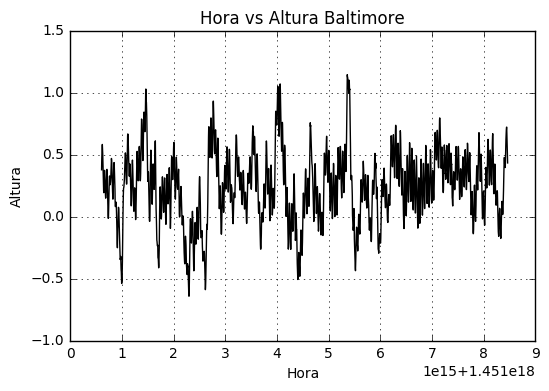

In [8]:
mplt.plot(x,y, color='k')
mplt.grid(True)
mplt.title('Hora vs Altura Baltimore')
mplt.xlabel("Hora")
mplt.ylabel("Altura")

mplt.show()

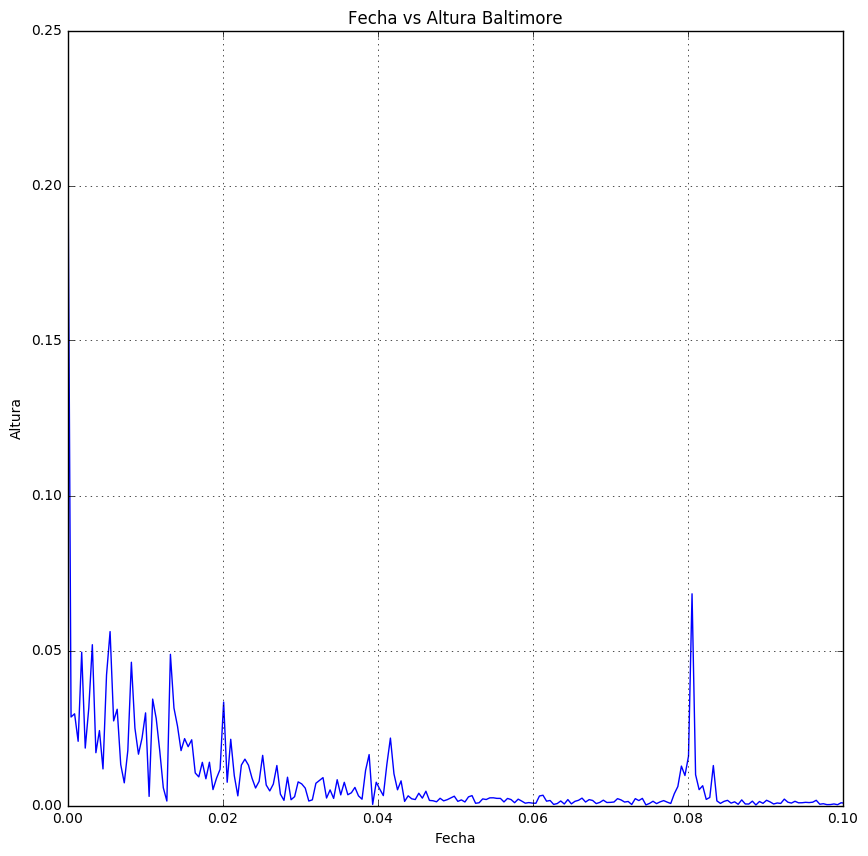

In [9]:
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 2184
# sample spacing
T = 1
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid(True)
plt.title('Fecha vs Altura Baltimore')
plt.xlabel("Fecha")
plt.ylabel("Altura")
plt.xlim(0,0.1)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [10]:
A=np.absolute(yf)/N

In [11]:
A[A[:,]>0.03]

array([ 0.23787134,  0.04946012,  0.03144628,  0.05187018,  0.04213037,
        0.05610421,  0.03104957,  0.04621175,  0.03432758,  0.04877159,
        0.03145338,  0.03338159,  0.06828875,  0.06828875,  0.03338159,
        0.03145338,  0.04877159,  0.03432758,  0.04621175,  0.03104957,
        0.05610421,  0.04213037,  0.05187018,  0.03144628,  0.04946012])

In [12]:
np.where(A[:,]>0.03)

(array([   0,    4,    6,    7,   11,   12,   14,   18,   24,   29,   30,
          44,  176, 2008, 2140, 2154, 2155, 2160, 2166, 2170, 2172, 2173,
        2177, 2178, 2180]),)

In [13]:
z = np.arange(0, 2184.0, 1.0)
df['T'] =  pd.Series(z, index =None)
df.head(), df.tail(), df.head(), df.tail()

(                 Fecha  Altura  Sigma  I  L    T
 0  1451606400000000000   0.377  0.002  0  0  0.0
 1  1451610000000000000   0.459  0.002  0  0  1.0
 2  1451613600000000000   0.513  0.001  0  0  2.0
 3  1451617200000000000   0.556  0.002  0  0  3.0
 4  1451620800000000000   0.581  0.003  0  0  4.0,
                     Fecha  Altura  Sigma  I  L       T
 2179  1459450800000000000   0.666  0.007  0  0  2179.0
 2180  1459454400000000000   0.609  0.007  0  0  2180.0
 2181  1459458000000000000   0.559  0.005  0  0  2181.0
 2182  1459461600000000000   0.497  0.006  0  0  2182.0
 2183  1459465200000000000   0.432  0.003  0  0  2183.0,
                  Fecha  Altura  Sigma  I  L    T
 0  1451606400000000000   0.377  0.002  0  0  0.0
 1  1451610000000000000   0.459  0.002  0  0  1.0
 2  1451613600000000000   0.513  0.001  0  0  2.0
 3  1451617200000000000   0.556  0.002  0  0  3.0
 4  1451620800000000000   0.581  0.003  0  0  4.0,
                     Fecha  Altura  Sigma  I  L       T
 2179

In [14]:
A0_m = np.absolute(yf[0]/N)
O1_m = np.absolute(yf[4]/N)
S1_m = np.absolute(yf[6]/N)
N2_m = np.absolute(yf[7]/N)
M2_m = np.absolute(yf[11]/N)
Q2_m = np.absolute(yf[12]/N)
F2_m = np.absolute(yf[14]/N)
S2_m = np.absolute(yf[18]/N)
D2_m = np.absolute(yf[24]/N)
G2_m = np.absolute(yf[29]/N)
H2_m = np.absolute(yf[30]/N)
J2_m = np.absolute(yf[44]/N)
K2_m = np.absolute(yf[176]/N)

T_S1 =  xf[int(1092 +4),]
T_N2 =  xf[int(1092 +6),]
T_M2 =  xf[int(1092 +7),]
T_S2 =  xf[int(1092 +11),]
T_Q2 =  xf[int(1092+12)]
T_R2 =  xf[int(1092+14)]
T_T2 =  xf[int(1092+18)]
T_Y2 =  xf[int(1092+24)]
T_U2 =  xf[int(1092+29)]
T_I2 =  xf[int(1092+30)]
T_O2 =  xf[int(1092+44)]
T_P2 =  xf[int(1092+176)]

In [15]:
T_S1s = np.angle(yf[int(4),])
T_N2s =  np.angle(yf[int(6),])
T_M2s =  np.angle(yf[int(7),])
T_S2s =  np.angle(yf[int(11),])
T_Q2s = np.angle(yf[int(12)])
T_R2s =  np.angle(yf[int(14)])
T_T2s =  np.angle(yf[int(18)])
T_Y2s =  np.angle(yf[int(24)])
T_U2s =  np.angle(yf[int(29)])
T_I2s =  np.angle(yf[int(30)])
T_O2s =  np.angle(yf[int(44)])
T_P2s =  np.angle(yf[int(176)])

In [25]:
y= df['Altura']
w= 2.0*np.pi

def f(t):
    return A0_m + 2*(O1_m*np.cos(w *T_S1*t+T_S1s) + S1_m*np.cos(w*T_N2*t+T_N2s) 
                     + N2_m*np.cos(w*T_M2*t+T_M2s) + M2_m*np.cos(w*T_S2*t+T_S2s) + Q2_m*np.cos(w*T_Q2*t+T_Q2s) 
                     +F2_m*np.cos(w*T_R2*t+T_R2s) +S2_m*np.cos(w*T_T2*t+T_T2s)+D2_m*np.cos(w*T_Y2*t+T_Y2s)
                     +G2_m*np.cos(w*T_U2*t+T_U2s)+H2_m*np.cos(w*T_I2*t+T_I2s)+J2_m*np.cos(w*T_O2*t+T_O2s)
                     +K2_m*np.cos(w*T_P2*t+T_P2s))

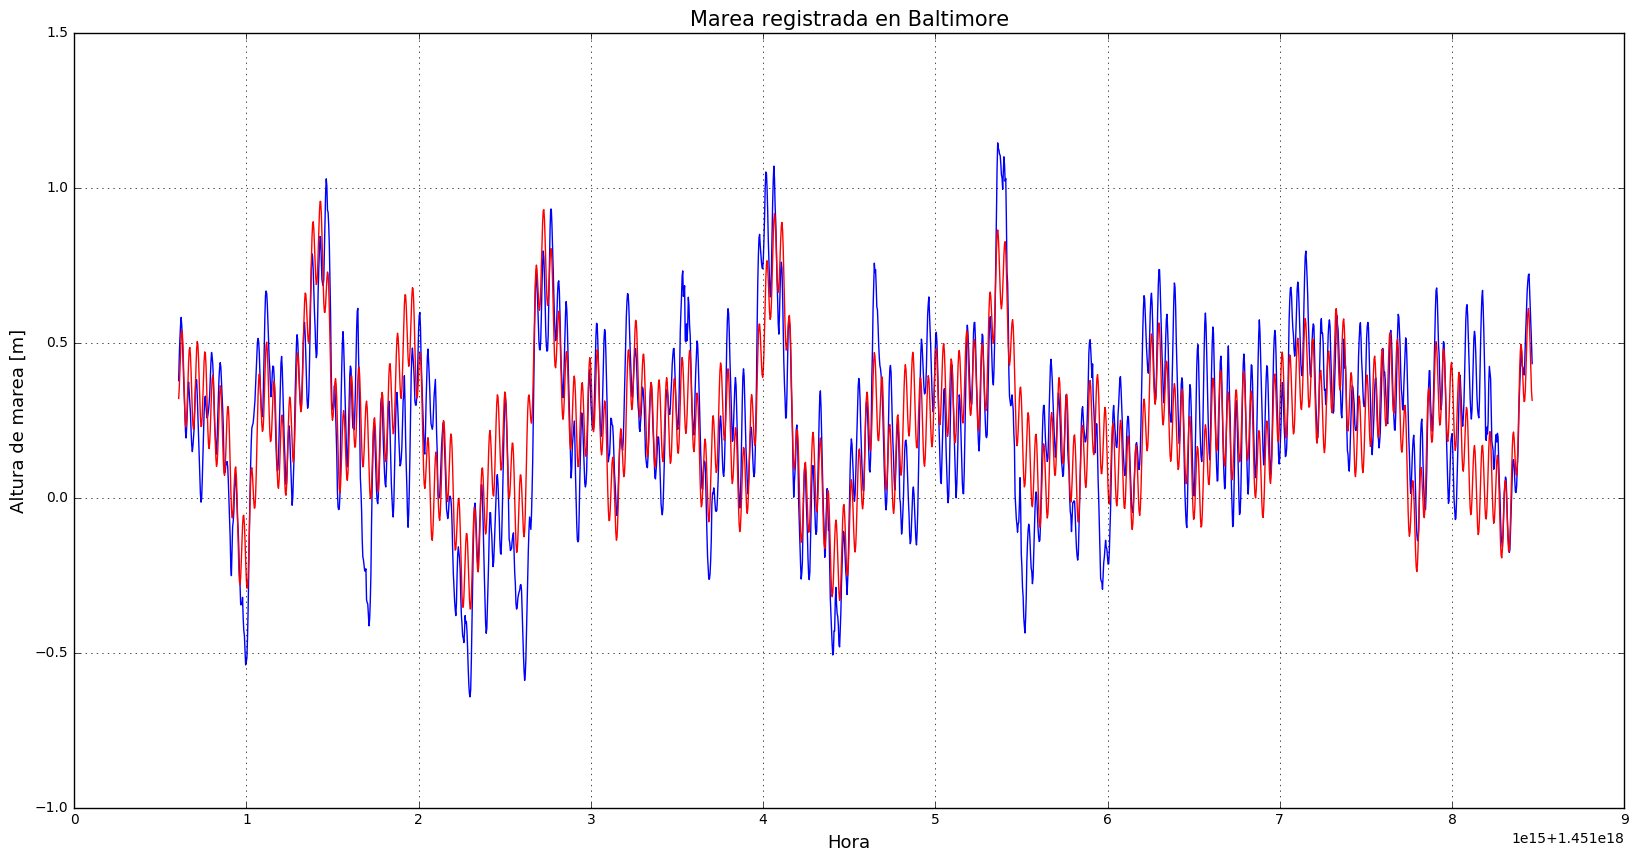

In [26]:
import matplotlib.pyplot as plt
plt.plot(df['Fecha'], y, 'b-', label ="Altura")
plt.plot(df['Fecha'], f(df['T']), 'r-', label='Altura reconstruida')
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Hora', fontsize = 13)
#plt.xlim(pd.Timestamp('2016-01-01 00:00:00'), pd.Timestamp('2016-01-31 23:00:00'))
plt.title('Marea registrada en Baltimore', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [27]:
y_0=df['Altura']
y_1=f(df['T'])

In [28]:
E= sum(abs(y_0-y_1)**2) / sum(abs(y_0)**2)
E

0.23922601700311358